# TP : Analyse en Composantes Principales (ACP) et choix du clustering

## 1. Introduction

### 🌟 Objectifs du TP
- Comprendre le fonctionnement du PCA (ACP en français)
- Réduire la dimension de données pour les visualiser
- Comparer les résultats de clustering (K-Means et DBSCAN) sur les données projetées

### 🔍 Qu'est-ce que le PCA ?
L'**Analyse en Composantes Principales** (ACP ou PCA pour *Principal Component Analysis*) est une méthode mathématique qui permet de :
- **Réduire le nombre de dimensions** d'un jeu de données,
- En conservant un maximum d'information (**variance**),
- En projetant les points dans un nouvel espace (appelé espace des composantes principales).

Cela permet notamment de **visualiser** des données complexes en 2D, ou de **prétraiter les données** avant un clustering.

### 🧹 Pourquoi prétraiter les données avec le PCA avant un clustering ?
- Lorsque les données ont **beaucoup de dimensions**, certaines peuvent être **corrélées ou peu informatives**.
- Le PCA élimine ces redondances et simplifie la structure des données.
- En réduisant le bruit et la complexité, cela peut :
  - améliorer la qualité des clusters,
  - faciliter le travail de K-Means ou DBSCAN,
  - réduire les temps de calcul.

En résumé, le PCA sert souvent de **filtre intelligent** avant de lancer un algorithme de regroupement.

## 2. Test avec un jeu de données multidimensionnel

Jusqu'ici, on n'a travaillé qu'avec des données ne comportant que deux dimensions pour une meilleure visibilité. Qu'en est-il des données mutidimensionnelles ?

In [ ]:
# Installation des bibliothèques
!pip install pandas numpy scikit-learn matplotlib seaborn

### 📁 2.1 Génération de données (5 dimensions)

In [ ]:
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt

# Création d'un jeu avec 5 caractéristiques
X, y = make_classification(n_samples=300, n_features=5, n_redundant=0, 
                           n_clusters_per_class=1, random_state=42)

# Conversion en DataFrame
df = pd.DataFrame(X, columns=[f"Feature_{i+1}" for i in range(X.shape[1])])
df.head()  # Affichage des attributs et des 5 premiers enregistrements

### 🔌2.2  Détermination des composantes et variance par l'algorithme PCA 

L'algorithme PCA va permettre de diminuer le nombre de dimensions, de 5 à 2 ici.

In [ ]:
from sklearn.decomposition import PCA

# Réduction à 2 composantes principales
pca = PCA(n_components=2)
X_reduit = pca.fit_transform(X)

Chaque **composante** est une combinaison linéaire de plusieurs critères, et c’est cette combinaison entière qui explique une part de la variance.

**La variance** :

- ❌ La variance expliquée par une composante ne reflète pas directement le poids d’un critère (ou variable).
- ✅ Le pourcentage de variation totale des données capté par chaque **composante principale**.



🎓 **<u>Exemple</u>** :
Si `Composante 1` explique 60% de la variance, cela signifie qu’en projetant toutes les données sur cet axe, on conserve 60 % de l'information globale. Mais cela ne dit pas quel critère (ex : revenu, âge...) est responsable de ce 60 %.




In [ ]:
# Détermination de la variance de chaque composante 
pca = PCA(n_components=2)  # 2 composantes
X_reduit = pca.fit_transform(X)
print(pca.explained_variance_ratio_)


On voit que seulement **55% (32% + 23%) de l'information** est conservée : il va falloir utiliser plus de composants.

In [ ]:
# Détermination de la variance de chaque composante 
pca = PCA(n_components=3) # 3 composantes
X_pca3 = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

On passe maintenant à **75% de l'information** de conservée : c'est bien mieux :).
Pour visualiser tout cela, on va afficher un **graphique par paire de composants**, ce sera plus lisible.

In [ ]:
from sklearn.decomposition import PCA

# Réduction à 3 composantes principales
pca = PCA(n_components=3)
X_pca3 = pca.fit_transform(X)


# Affichage des 3 combinaisons de composantes principales
pairs = [(0, 1), (0, 2), (1, 2)]
for i, j in pairs:
    plt.figure()
    plt.scatter(X_pca3[:, i], X_pca3[:, j], s=50)
    plt.xlabel(f"Composante {i+1}")
    plt.ylabel(f"Composante {j+1}")
    plt.title(f"Projection : Composantes {i+1} et {j+1}")
    plt.grid(True)
    plt.show()

### 📊 2.3 Comparaison avec K-Means / DBSCAN

**<u>Remarque</u>** : on pourra toujours appliquer la `méthode du coude (K-Means)` et le `k-distance-plot (DBSCAN)` pour déterminer les **meilleurs paramètres** (n_cluster et eps / min_samples).

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from collections import Counter
import numpy as np


### 🔎 Application de K-Means 
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Meilleur k observé
k_labels = kmeans.fit_predict(X_pca3)

# Affichage 2D selon les 2 premières composantes
plt.scatter(X_pca3[:, 0], X_pca3[:, 1], c=k_labels, cmap="viridis", s=50)
plt.title("K-Means sur données PCA (3 composantes)")
plt.show()



### 🔎 DBSCAN
dbscan = DBSCAN(eps=0.813, min_samples=3)  # Meilleure estimation eps/min_samples
d_labels = dbscan.fit_predict(X_pca3)

# Affichage 2D selon les 2 premières composantes
plt.scatter(X_pca3[:, 0], X_pca3[:, 1], c=d_labels, cmap="plasma", s=50)
plt.title("DBSCAN sur données PCA (3 composantes)")
plt.show()

**<u>Remarque</u>** : on peut aussi proposer un **affichage en 3D** à titre informatif.

In [ ]:
### 🧊 Affichage 3D avec matplotlib
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca3[:, 0], X_pca3[:, 1], X_pca3[:, 2], c=k_labels, cmap='viridis', s=50)
ax.set_xlabel("Composante 1")
ax.set_ylabel("Composante 2")
ax.set_zlabel("Composante 3")
ax.set_title("Visualisation 3D des données PCA + K-Means")
plt.show()

### 🎯2.4. Comparaison / Questions

- Qu'observe-t-on ? *On observe que les données projetées en 2D conservent une structure qui permet de distinguer plusieurs groupes.
  Les points forment des regroupements visibles, bien que la séparation ne soit pas toujours nette.*
  
  
- Le **clustering** change-t-il entre K-Means et DBSCAN ? *Oui. K-Means impose un nombre fixe de clusters et découpe l'espace de façon circulaire. DBSCAN, lui, détecte automatiquement les groupes selon la densité des points et peut identifier du bruit.*


- Quels sont les **avantages / inconvénients** visibles ? *K-Means détermine efficacement 3 clusters (on pourrait essayer avec d'autres valeurs). DBSCAN n'est pas fiable ici, les données ne sont pas assez denses et/ou trop espacées.*


- Que nous apprend la projection PCA sur la forme des données ? *Elle montre que les données initiales à 5 dimensions peuvent être bien représentées dans un espace ici à 3 dimensions tout en conservant une bonne partie de la structure. Cela facilite la visualisation et le clustering.*


## 3. TP : Catégoriser des patients selon le risque de cancer.


## 🎯 Objectifs du TP
- Analyser un jeu de données contenant des informations sur des **facteurs de risque de cancer**.
- Réduire la dimension des données à 2 ou 3 composantes avec PCA.
- Visualiser les individus dans l'espace réduit.
- Explorer les regroupements potentiels par clustering (`K-Means` ou `DBSPAN`).

Un fichier de données contient 2000 clients fictifs avec les informations suivantes :
- `âge` (en années)
- `poids` (en kg)
- `antécédents familiaux` (oui / non)
- `tabac` (oui / non)
- `alcool` (oui / non)
- `activité sportive`(faible, moyenne, intense)

### 📥 3.1 – Chargement des données avec pandas

In [8]:
# Chargement depuis un fichier CSV (à placer dans le même dossier que ce notebook)
import pandas as pd

df = pd.read_csv("donnees_cancer_pca.csv", encoding="utf-8", encoding_errors="ignore")  # Noter le UTF-8 :)
print(df.head())

         Âge      Poids Fumeur Consommation_Alcool Antécédents_Familiaux  \
0  42.483571  52.923146    Non                 Non                   Non   
1  39.308678  57.896773    Non                 Non                   Non   
2  43.238443  58.286427    Non                 Non                   Non   
3  47.615149  55.988614    Non                 Non                   Non   
4  38.829233  59.193571    Non                 Non                   Non   

  Activité_Physique  
0           Intense  
1           Intense  
2           Intense  
3           Intense  
4           Intense  


### 🔄 3.2 – Encodage des données

Avant d'appliquer le PCA, il faut convertir les variables non numériques en format numérique. On utilise :

- `LabelEncoder` pour les **variables ordinales**, c'est-à-dire celles qui ont un ordre logique entre les modalités (ex : "Faible" < "Modérée" < "Intense").
- `get_dummies` pour les **variables nominales**, qui représentent des catégories sans ordre (ex : "Oui" ou "Non").


**<u>Remarques</u>** :
- On pourrait utiliser tout le temps `LabelEncoder` même à la place de `get_dummies`, attention à ne pas introduire **d'ordre artificiel**.
- `get_dummies` permet d'encoder plusieurs attributs en même temps contrairement à `LabelEncoder`.


#### 🧠 **Fonctionnement** de `get_dummies` 

Quand `get_dummies` encode une variable binaire comme "*Fumeur*" avec les modalités "*Oui*" et "*Non*", il crée deux colonnes :

| Fumeur_Oui | Fumeur_Non |
|------------|------------|
| 1          | 0          |
| 0          | 1          |

Avec `drop_first=True`, seule la colonne `Fumeur_Oui` est conservée. Cela évite les **redondances** et les **liens entre attributs** qui pourraient perturber des algorithmes contre les régressions et le PPCA

In [23]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


# On crée une copie de df pour travailler dessus sans modifier l'original
# Cela évite d'altérer le DataFrame de base si on veut le réutiliser ensuite 
# (l'encodage rajoute des colonnes et modifie les valeurs).
X = df.copy()


# Encodage de l'activité physique (ordinale)
le = LabelEncoder()
X["Activité_Physique"] = le.fit_transform(X["Activité_Physique"])

# Encodage one-hot des autres variables catégorielles (non ordonnées)
# Le drop_first = True permet d'éviter les redondances 
X_encoded = pd.get_dummies(X, columns=["Fumeur", "Consommation_Alcool", "Antécédents_Familiaux"], drop_first=True)

### 🧠 3.4  Analyse en composantes principales (PCA)

Il faut déterminer le nombre de composantes optimal pour le PCA. Mais avant cela, il faut **standardiser** les critères, c'est à dire leur donner un **poids égal** (les composantes sont des combinaisons linéaires des critères fournis, ainsi, un âge entre 40 et 70 ans pèserait bien plus qu'un 0 / 1 caractérisant un fumeur ou non).

✅ Ce que fait `StandardScaler` :
Il transforme chaque colonne pour qu’elle ait :
- une moyenne = 0
- un écart type = 1

Autrement dit, il met toutes **les variables sur la même échelle**, ce qui rend leur importance équivalente dans le PCA.

✅ Nombre de **composantes nécessaires** au PCA : un minimum de **75% d'informations retenues** est attendu ici.

In [11]:
# Mise des variables à la même échelle
X_scaled = StandardScaler().fit_transform(X_encoded)


# TEST : PCA avec 2 composantes (avec résultats)
################### A COMPLETER ########################

# TEST : PCA avec 3 composantes (avec résultats)
################### A COMPLETER ########################

Variance expliquée par composante : [0.6983173  0.25243513]
Variance expliquée par composante : [0.6983173  0.25243513 0.03271261]


### 📌Questions

- 1. **Compléter** le code manquant permettant de tester le PCA pour 2 et 3 composantes. On notera **<u>obligatoirement</u>** `X_pca` les données travaillées après l'entraînement du modèle PCA.
- 2. **Conclure** sur le nombre de composantes.

**<u>Aide</u>** : on verra ici que *2 composantes* sont largement suffisantes (95% d'informations retenues).

### 🧠 3.5  Application du PCA et détermination du meilleur modèle K-Means / DBSCAN


Variance expliquée par composante : [0.6983173  0.25243513]


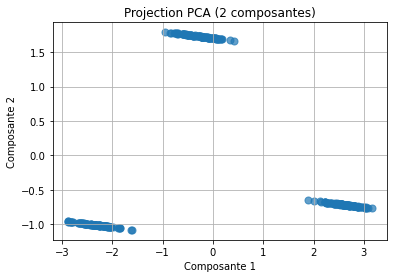

In [14]:
# Application de la PCA avec le bon nombre de composantes
################### A COMPLETER ########################

# Affichage 2D 
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50, alpha=0.7)
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("Projection PCA (2 composantes)")
plt.grid(True)
plt.show()

### 📌Questions

- 1. **Compléter** le code manquant.
- 2. Quel modèle entre le **K-Means** et le **DBSCAN** pourrait-on appliquer ici ? Justifier. ON FERA UNE ANALYSE SEULEMENT QUALITATIVE (pas de tests).

### 🧠 3.6  Application du PCA et détermination du meilleur modèle entre K-Means et DBSCAN

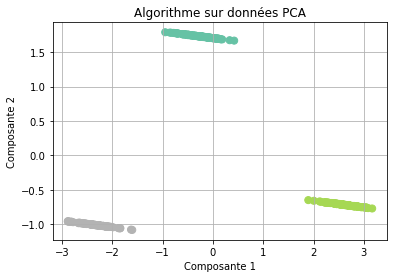

In [15]:
# Application du meilleur modèle avec les bons critères
################ A COMPLETER ###################


# Affichage des résultat
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set2', s=50)
plt.title("Algorithme sur données PCA")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.grid(True)
plt.show()

### 📌Question

A priori, quels groupes de patients peut-on proposer à partir des résultats ?  